# Stack Overflow Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import time
import seaborn as sns

In [2]:
from os import getcwd, listdir, chdir

filename = '/Dataset/2016 Stack Overflow Survey Responses.csv'
df = pd.read_csv(getcwd() + filename)

df.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print "Dataset has {} rows and {} columns".format(*df.shape)

Dataset has 56030 rows and 66 columns


# Understanding the columns and extracting the target columns for predictions

## There are a few things I'd like to do for a general plan:

1 Look at and understand the data

2 Determine a target column to train and predict

3 Take a few columns as features, and use them for as the target column for each prediction

4 Mine, separate, and preprocess the data

4 Find patterns in the data, then trim the dataset as needed for in depth analysis

5 Make predictions, such as predict if a person is looking for a new job, so a recruiter will be able to contact them.

I'd like to understand more about the people who are currently working. Can we determine groups of people and their personalities, based on the importance of the workplace questions? From there, can we determine if those different types of people are looking for a new job? Can an ideal company be created to optimize worker happiness (of course, there are tradeoffs)?

By looking at the columns, I'll choose features that I think are important and list the reasons alongside them:

'age_range'           - does age determine if the person is looking for a                         new job?
'experience_range'    - does their level of experience encourage them to                           hop around to different companies?
'programming_ability' - this is not just a measure of their perceived                             ability but also a measure of their confidence 
'agree_loveboss'      - can they tolerate their bosses easily
'important_variety'   - would they rather switch roles often or do they                           prefer to stay with a specialty
'important_control'   - i hypothesize that this relates to b
'important_promotion' - do they care about promotions? i know some would                           rather be coding
'important_newtech'   - 
'important_companymission' - do they care about this much?
'important_buildexisting' - i think this would be the opposite of working                             with a variety of projects
'important_buildnew'  - build new?
'important_wfh'       - would this really matter?
'developer_challenges'- are there certain things that developers could do                         without?
'new_job_value'       - important about new employment opportunity, this                           is important to know
'tech_want'           - 
'education'           - 
'industry'            - 
'agree_notice'        - this shows how some brains work
'agree_nightcode'     - because these guys are a different type of animal
'occupation'          - 


## Feature Selection

Of the 66 features, I'll select features that I believe will be influential in deciding the prediction

In [6]:
# Combine all columns into one dataframe
work_xp = ['age_range', 'experience_range', 'programming_ability', 'agree_loveboss',
           'important_variety', 'important_control', 'important_promotion',
           'important_newtech', 'important_companymission', 'important_buildexisting',
           'important_buildnew', 'important_wfh', 'developer_challenges',
           'new_job_value', 'education', 'occupation', 'open_to_new_job']

# create a dataframe template
work_xp_df = df[work_xp]
    
original = work_xp_df
original_shape = work_xp_df.shape # shape before dropping NaN entries


## NaN values

I'd like to observe the frequency of rows by the number of their NaN values. From there, I can drop rows that have too many NaN values.

In [8]:
# Analyzing each row's number of NaN entries
from sklearn.preprocessing import Imputer

count_original = {}

for row, data in original.iterrows():
    no_nan = data.isnull().sum()
    
    if no_nan in count_original:
        count_original[no_nan] += 1
    else:
        count_original[no_nan] = 1
        
for i, j in count_original.iteritems():
    print "{} rows have {} NaN values".format(j, i)
    
print "{:.2f}% of the rows have 4 or less NaN entries".format(float(36197+5620+666+115) / max(*original.shape)*100)
print "{:.2f}% of the rows have 10 or more NaN entries".format(float(196+1243+287+950+3884+422+77+6036+170) / max(*original.shape)*100)

36197 rows have 0 NaN values
5620 rows have 1 NaN values
666 rows have 2 NaN values
115 rows have 3 NaN values
46 rows have 4 NaN values
29 rows have 5 NaN values
22 rows have 6 NaN values
29 rows have 7 NaN values
41 rows have 8 NaN values
196 rows have 9 NaN values
1243 rows have 10 NaN values
287 rows have 11 NaN values
950 rows have 12 NaN values
3884 rows have 13 NaN values
422 rows have 14 NaN values
77 rows have 15 NaN values
6036 rows have 16 NaN values
170 rows have 17 NaN values
76.03% of the rows have 4 or less NaN entries
23.67% of the rows have 10 or more NaN entries


In [17]:
# Analyzing the number of NaN values per column
i = 1
print "Number of NaN entries per column: "
for col in original:
    print col, pd.isnull(original[col]).sum()

Number of NaN entries per column: 
age_range 303
experience_range 6510
programming_ability 9048
agree_loveboss 13934
important_variety 13402
important_control 13458
important_promotion 13547
important_newtech 13426
important_companymission 13501
important_buildexisting 13450
important_buildnew 13492
important_wfh 13448
developer_challenges 14934
new_job_value 12372
education 11075
occupation 6511
open_to_new_job 11650


I noticed 3 groups of rows:

Group 1: this cluster of rows have four or less NaN values

Group 2: this cluster of rows have nine or more NaN values

Group 3: these "few" rows have between four and eight NaN values

I'll drop all rows that have more than 3 NaN values

In [18]:
# remove rows with more than 3 NaN entries
work_xp_df = work_xp_df.dropna(thresh=(min(*work_xp_df.shape) - 3))

reduced = work_xp_df.shape # shape after dropping NaN entries
# equation to calculate the percent change
percent_change = float((original_shape[0] - reduced[0])) / float(original_shape[0]) * 100
print "Using the .dropna() function reduces the data by {:.2f}% to these dimensions {}\n".format(percent_change, reduced)

Using the .dropna() function reduces the data by 23.97% to these dimensions (42598, 17)



The dropna() function removed some rows and left the remaining rows in their place, meaning their indecies [1, 3, 5, 7, 9, 11, 12, 13] aren't updated. I'll compress the rows and fill in the missing indices.

In [21]:
# this updates the indices
work_xp_df.index = range(1, max(*work_xp_df.shape)+1)
work_xp_df.head()

,age_range,experience_range,programming_ability,agree_loveboss,important_variety,important_control,important_promotion,important_newtech,important_companymission,important_buildexisting,important_buildnew,important_wfh,developer_challenges,new_job_value,education,occupation,open_to_new_job
1,30-34,6 - 10 years,7.0,Agree somewhat,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,I don't care about this,This is very important,I don't care about this,Unrealistic expectations; Interacting with non...,Salary; Ability to make or influence important...,I'm self-taught; On-the-job training; B.S. in ...,Mobile developer - iOS,I am not interested in new job opportunities
2,NaN,11+ years,8.0,Disagree completely,This is somewhat important,I don't care about this,I don't care about this,This is somewhat important,I don't care about this,This is very important,This is very important,This is very important,Corporate policies; Interacting with non-techn...,Office location; Remote working option; Flexib...,I'm self-taught; On-the-job training,DevOps,"I'm not actively looking, but I am open to new..."
3,25-29,1 - 2 years,7.0,Agree completely,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,I don't care about this,Non-technical management; Poor infrastructure ...,Salary; Company size; Job title,B.S. in Computer Science (or related field),Back-end web developer,"I'm not actively looking, but I am open to new..."
4,20-24,1 - 2 years,3.0,Neutral,This is very important,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,Poor documentation,Tech stack; Opportunity for advancement,I'm self-taught; On-the-job training; Online c...,Back-end web developer,"I'm not actively looking, but I am open to new..."
5,20-24,6 - 10 years,9.0,Agree completely,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,Poor team dynamics; Inefficient development pr...,Salary; Company stage; Work/life balance; Oppo...,"I'm self-taught; Online class (e.g. Coursera, ...",Full-stack web developer,"I'm not actively looking, but I am open to new..."


## Split columns into features and label columns

In [25]:
# dataset of the features
feature_cols = work_xp_df.columns[:min(*work_xp_df.shape) - 1]
# dataset of the label column
label_col = work_xp_df.columns[-1]

print work_xp_df[label_col].groupby(work_xp_df[label_col]).count()

print feature_cols

open_to_new_job
I am actively looking for a new job                              6569
I am not interested in new job opportunities                     9112
I'm not actively looking, but I am open to new opportunities    26792
dtype: int64
Index([u'age_range', u'experience_range', u'programming_ability',
       u'agree_loveboss', u'important_variety', u'important_control',
       u'important_promotion', u'important_newtech',
       u'important_companymission', u'important_buildexisting',
       u'important_buildnew', u'important_wfh', u'developer_challenges',
       u'new_job_value', u'education', u'occupation'],
      dtype='object')


# First, the features

## The columns need to be vectorized and normalized, since they are currently formatted into categories, objects, and strings

The feature columns are more complicated, since each are formatted differently. The features need to be categorized into different groups, based on how they need to be vectorized. Then we need to call a function on each of those groups to get the DataFrame's final desired format.

One challenge I'm thinking of is that the vectorized columns are unable to be inverse-transformed, meaning once ['red', 'white', 'blue'] is turned into [0, 1, 2], will we need to label the vectors ['red', 'white', 'blue'] for identifying the entries in the column.

In [29]:
# before vectorizing the feature columns, we'll take a look at how all of them are formatted
features = work_xp_df[feature_cols]

print features[features.columns[0:5]].head()
print "\n"
print features.education[0:5]

  age_range experience_range  programming_ability       agree_loveboss  \
1     30-34     6 - 10 years                  7.0       Agree somewhat   
2       NaN        11+ years                  8.0  Disagree completely   
3     25-29      1 - 2 years                  7.0     Agree completely   
4     20-24      1 - 2 years                  3.0              Neutral   
5     20-24     6 - 10 years                  9.0     Agree completely   

            important_variety  
1      This is very important  
2  This is somewhat important  
3      This is very important  
4      This is very important  
5  This is somewhat important  


1    I'm self-taught; On-the-job training; B.S. in ...
2                 I'm self-taught; On-the-job training
3          B.S. in Computer Science (or related field)
4    I'm self-taught; On-the-job training; Online c...
5    I'm self-taught; Online class (e.g. Coursera, ...
Name: education, dtype: object


## the columns that need to be vectorized are converting the entries to numbers range(0, n)
## the columns that need to be converted to binary columns have multiple answers

age_range: the age_range needs to be vectorize

experience_range: vectorize

programming_ability: vectorize

agree_loveboss: vectorize

important_variety: vectorize

important_contro: vectorize

important_companymission: vectorize

important_buildexisting: vectorize

important_buildnew: vectorize

important_wfh: vectorize

developer_challenges: convert to binary columns

new_job_value: convert to binary columns

education: convert to binary columns

occupation: vectorize

We'll create two functions for these two groups

In [31]:
# this is a list of all the columns that need to be expanded into dummy columns
large_columns = ["developer_challenges", "new_job_value", "education"]

## Before vectorizing the feature data

We need to convert the NaN values to -1

In [35]:
# convert NaN values to -1
work_xp_df = work_xp_df.fillna(value=-1)

## Vectorizing the Features

In [34]:
# converting all text and categorical data into numerical data

# this function uses the LabelEncoder() to convert entries into numeric values
def vectorize_data(df, col):
    # bug: dataframe entry is shifted
    le = LabelEncoder()
    le.fit(df[col])
    vectorized = le.transform(df[col])
    
    # need to shift data, so the first index is 1, not 0
    return pd.DataFrame(vectorized, columns=[col], index=range(0, max(*df.shape)))


# NaN values == -1 and vectorizes categorical data
def vectorize_data2(df, col):
    # first create the mapper
    mapper = {}
    counter = 0
    
    for idx, entry in df[col].iteritems():
        if entry == -1 and entry not in mapper:
            mapper[entry] = entry
        elif entry not in mapper:
            mapper[entry] = counter
            counter += 1
            
    return pd.DataFrame(df[col].map(mapper), index=range(1, max(*df.shape)+1))


# this function splits the multiple answers into all columns and inputs binary entries
def convert_to_binary_columns(df, column_name):
    a = df[column_name].str.get_dummies(sep='; ')
    if "-1" in a.columns:
        del a["-1"]
    return a


# this main function uses the converters above to transform the entire dataset
def main_transform_columns(df):
    outX = pd.DataFrame(index=df.index)
    binary = ["developer_challenges", "new_job_value", "education"]
    
    for col in df.columns:
        if work_xp_df[col].dtype == float:
            outX = outX.join(df[col].fillna(-1))
        elif col in binary:
            expanded_col = convert_to_binary_columns(df, col)
            outX = outX.join(expanded_col)
        else:
            vec_col = vectorize_data2(df, col)
            outX = outX.join(vec_col)
            
    return outX
    

# fillna for features
fillna_features = main_transform_columns(work_xp_df[work_xp_df.columns[:-1]])

## Now, the label column

The label column has three entries: [“I am not interested in new job opportunities”, “I’m not actively looking, but I am open to new opportunities”, “I am actively looking for a new job”]. I'd have to convert "I am not interested in new job opportunities" to have a value of 0 and the other two entries to a value of 1.

Since the purpose of this project is targeting anyone who's open to new jobs, we're also setting "I'm not actively look, but I am open to new opportunities" entries to 1.

In [39]:
# vectorize label column
mapper = {"I am not interested in new job opportunities": 0,
          "I'm not actively looking, but I am open to new opportunities": 1,
          "I am actively looking for a new job": 1}

label = pd.DataFrame(work_xp_df[label_col].map(mapper))

#fillna for label
label = label.fillna(value=-1)

print label.head()
print "\n"

counter = {}
for a, b in label[label.columns[0]].iteritems():
    if b not in counter:
        counter[b] = 1
    else:
        counter[b] += 1
        
print "Frequency of each entry: {}".format(counter)

   open_to_new_job
1              0.0
2              1.0
3              1.0
4              1.0
5              1.0


Frequency of each entry: {0.0: 9112, 1.0: 33361, -1.0: 125}


In [19]:
# Doesn't produce good results

# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# label2 = pd.DataFrame(work_xp_df[label_col].map(mapper)).fillna(value=-1)

# le = LabelEncoder()
# le.fit(label_using_onehotencoder)
# label_using_labelencoder = le.transform(label_using_onehotencoder)

# ohe = OneHotEncoder()
# ohe.fit(label_using_labelencoder)
# label_using_onehotencoder = ohe.transform(label_using_labelencoder).data

# np.unique(label_using_onehotencoder)

## Combine the feature and label columns

The feature and label columns will be recombined into one df. Each set still has -1 values in place of the NaN entries. I'll now use the NearestNeighbors() algorithm to fill in each -1 value with the mode values of the five closest neighbors.

In [41]:
fillna_df = pd.concat([fillna_features, label], axis=1)

In [47]:
from sklearn.neighbors import NearestNeighbors
from math import isnan
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# fill in -1 values, using KNN
def fill_nan(df):
    # df must already be vectorized
    
    five_neighbors = NearestNeighbors(n_neighbors=5)
    five_neighbors.fit(df)
    
    # iterate through the rows
    for row, data in df.iterrows(): # Series
        # counts the number of NaN values
        no_of_nan = df.iloc[row - 1][df.iloc[row - 1] == -1].count()
        counter = 0
        
        if no_of_nan > 0:
            # collect the 5 nearest neighbors
            dist, n_indices = five_neighbors.kneighbors(df.iloc[row])
            
            while counter < no_of_nan:
                for col_name, v in data.iteritems():
                    if int(v) == -1:
                        counter += 1
                        # row enumeration starts with 1
                        neighbors_mode = stats.mode(df[col_name].iloc[n_indices[0]])[0][0]
                        df.set_value(row, col_name, neighbors_mode)
                        
        # used for observing running speed here
        #if row % 10 == 0: print row
                    
    return df

a = time.time()
cleaned_df = fill_nan(fillna_df)
run_time = time.time() - a # ~60 seconds

In [48]:
run_time

53.47847604751587

In [49]:
cleaned_df.head()

,age_range,experience_range,programming_ability,agree_loveboss,important_variety,important_control,important_promotion,important_newtech,important_companymission,important_buildexisting,...,Industry certification program,Masters Degree in Computer Science (or related field),"Mentorship program (e.g. Flatiron School, GDI, etc.)",On-the-job training,"Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)",Part-time program (e.g. night school),PhD in Computer Science (or related field),Some college coursework in Computer Science (or related field),occupation,open_to_new_job
1,0,0,7.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
2,1,1,8.0,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,1,1.0
3,1,2,7.0,2,0,0,2,0,2,1,...,0,0,0,0,0,0,0,0,2,1.0
4,2,2,3.0,3,0,2,2,0,0,2,...,0,0,0,1,1,0,0,0,2,1.0
5,2,0,9.0,2,1,0,2,0,2,2,...,0,0,0,0,1,0,0,0,3,1.0


## Further analysis

I wanted to further analyze the frequencies of entries from the dummy columns, out of curiosity

(42598, 16)


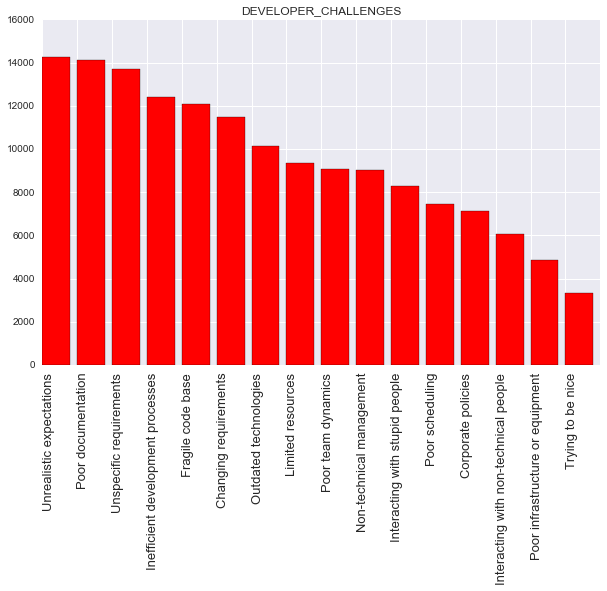

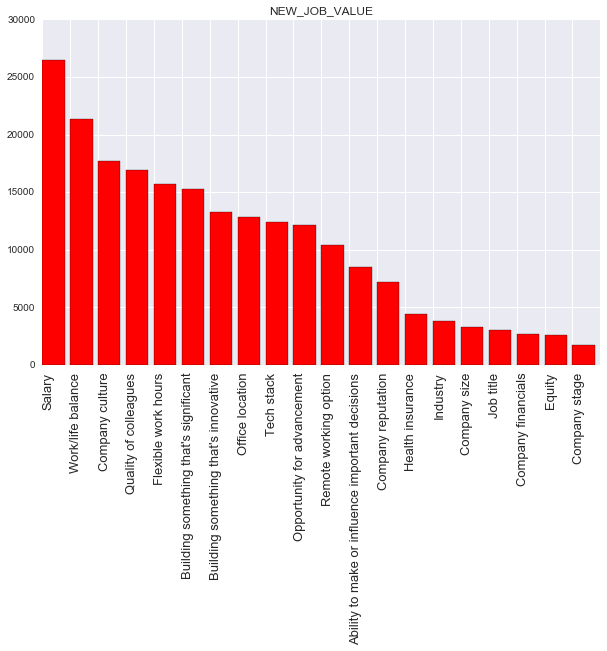

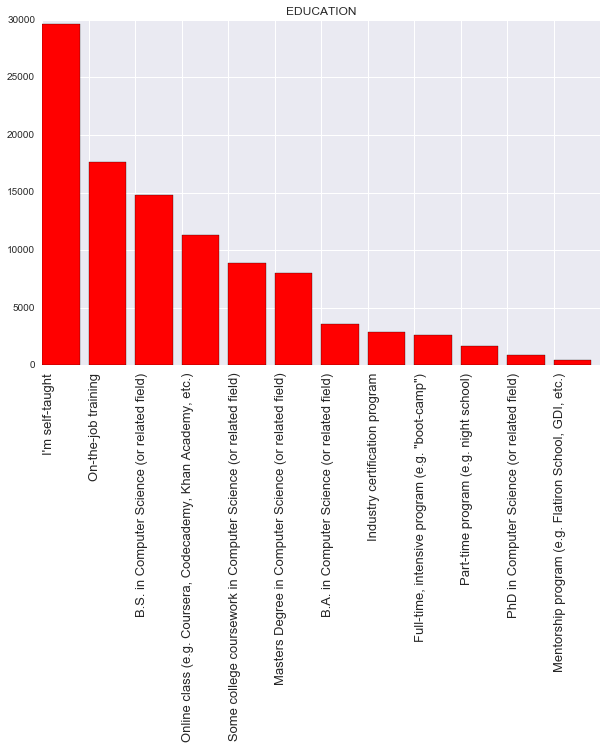

In [50]:
def class_name(objct):
    return objct.__class__.__name__

# make bar graphs
def plot_axes(df, column_name):
    if class_name(df) == 'DataFrame':
        binary_df_sum = convert_to_binary_columns(df, column_name).sum()
    elif class_name(df) == 'Series':
        binary_df_sum = df
        
    binary_df_sum.sort_values(inplace=True, 
                              ascending=False,
                              na_position='first')
    x = binary_df_sum.index
    y = binary_df_sum
    
    return x, y, column_name


def plot_binary_df((x, y, column_name)):
    ind = np.arange(len(y))

    pl.figure(figsize=(10,8))
    pl.title("{}".format(column_name.upper()))
    pl.bar(np.arange(len(x)),
           y.values,
           color='r',
           tick_label=list(x))
    pl.xticks(np.arange(len(x)), list(x), rotation='vertical', fontsize=13, horizontalalignment='left')
    pl.subplots_adjust(bottom=0.30)
    pl.show()

# plot bar graphs of each of the listed columns, using the functions above
print features.shape
for column in large_columns:
    sub_df = plot_binary_df((plot_axes(features, column)))

In [51]:
print "Feature columns:\n"
for col in cleaned_df.columns[:-1]:
    print col
    
print "\n\nLabel columns:\n"
print label.columns[0]

Feature columns:

age_range
experience_range
programming_ability
agree_loveboss
important_variety
important_control
important_promotion
important_newtech
important_companymission
important_buildexisting
important_buildnew
important_wfh
Changing requirements
Corporate policies
Fragile code base
Inefficient development processes
Interacting with non-technical people
Interacting with stupid people
Limited resources
Non-technical management
Outdated technologies
Poor documentation
Poor infrastructure or equipment
Poor scheduling
Poor team dynamics
Trying to be nice
Unrealistic expectations
Unspecific requirements
Ability to make or influence important decisions
Building something that's innovative
Building something that's significant
Company culture
Company financials
Company reputation
Company size
Company stage
Equity
Flexible work hours
Health insurance
Industry
Job title
Office location
Opportunity for advancement
Quality of colleagues
Remote working option
Salary
Tech stack
Work/life

## We can use PCA to find a correlation between features

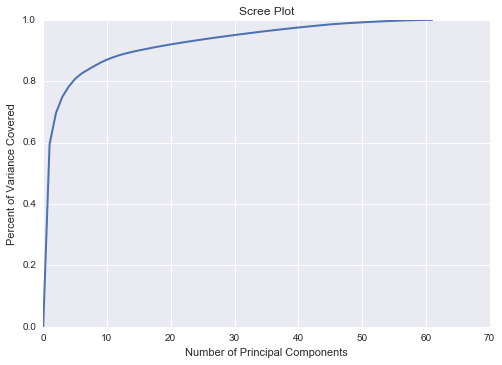

None
[ 0.59462186  0.69619374  0.7492438   0.78254116  0.80769997  0.82487973
  0.83746444  0.84938392  0.8607582   0.87040634  0.87831368  0.88532305
  0.89079204  0.89589776  0.90038171  0.90454513  0.90868229  0.91272729
  0.91637242  0.91993911  0.92344062  0.92678569  0.92995976  0.93311144
  0.93615558  0.93916971  0.94211953  0.94495107  0.94773301  0.9504715
  0.9531755   0.95583365  0.95845948  0.96097504  0.9634686   0.9659016
  0.96828684  0.97061767  0.97288186  0.97506053  0.97715506  0.9792095
  0.98124375  0.9832335   0.98518175  0.9867477   0.98819279  0.98953136
  0.99074886  0.99191123  0.99299179  0.99403493  0.99505416  0.99594654
  0.99678461  0.99760652  0.998379    0.9989611   0.99950695  0.99981679
  1.        ]


In [52]:
# use PCA to reduce the data into lower dimensions
from sklearn.decomposition import PCA

def feature_components_evr(feature_columns):
    pca = PCA(n_components=min(*feature_columns.shape))
    pca.fit(feature_columns)
    
    return pca.components_, pca.explained_variance_ratio_
    
    
def scree_plot(evr):
    """Used to determine the number of components to use for PCA"""
    evr = np.concatenate([[0], evr])
    cum_evr = np.cumsum(evr)
    
    pl.figure()
    pl.title("Scree Plot")
    pl.plot(cum_evr, lw=2, label="Cumulative Explained Variance Ratio")
    pl.xlabel("Number of Principal Components")
    pl.ylabel("Percent of Variance Covered")
    pl.show()

fce = feature_components_evr(fillna_features)

print scree_plot(fce[1])
print np.cumsum(fce[1])

## Based on the scree plot, above, I decided to use 3 principal components
The elbow method isn't apparent here, but I'll use 3 principal components. The change in data information isn't significant from 3 to 4 principal components.

## Now, I'll scale and reduce the data. The data will only have the feature columns, leaving out the label column.
Before scaling, we need to take a look at the distribution of data for each column

Also, I'd like to analyze which features are correlated with each other 

In [54]:
from sklearn.preprocessing import StandardScaler

first_pc = feature_components_evr(fillna_features)[0][0]
second_pc = feature_components_evr(fillna_features)[0][1] 
third_pc = feature_components_evr(fillna_features)[0][2]

cleaned_features = cleaned_df[cleaned_df.columns[:-1]]

# scale to a distribution with mean = 0 and sd = 1
# bad with data that isn't normally distributed, can be a problem with categorized data that turned into vectors
# might have to change the scaling method later
scaled_data = StandardScaler().fit_transform(cleaned_features)
# reduce data, using 4 principal components
reduced_data = PCA(n_components=4).fit_transform(cleaned_features)
# reduced and scaled
reduced_scaled_data = StandardScaler().fit_transform(reduced_data)

print "Original data: {} rows, {} columns".format(*cleaned_features.shape)
print "Scaled data: {} rows, {} columns".format(*scaled_data.shape)
print "Reduced data: {} rows, {} columns".format(*reduced_data.shape)
print "Reduced and scaled data: {} rows, {} columns".format(*reduced_scaled_data.shape)
print "First PC: {}".format(first_pc[:5])
print "Second PC: {}".format(second_pc[:5])
print "Third PC: {}".format(third_pc[:5])

Original data: 42598 rows, 61 columns
Scaled data: 42598 rows, 61 columns
Reduced data: 42598 rows, 4 columns
Reduced and scaled data: 42598 rows, 4 columns
First PC: [ 0.01178524  0.0019528  -0.0102545  -0.00149372 -0.00069772]
Second PC: [-0.10553744  0.15405869 -0.98036653  0.01941789  0.00514029]
Third PC: [ 0.98451685 -0.07229149 -0.1149418   0.06509307  0.01054794]


## Now, I'd like to visualize the reduced data and observe the principal components

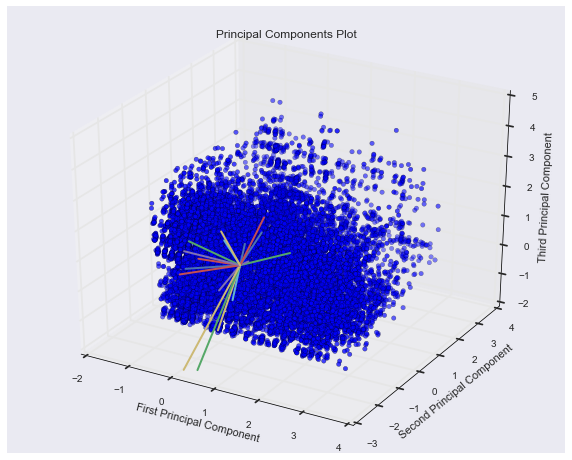

In [55]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties
%matplotlib inline

scaled_pca = PCA(n_components=3).fit(scaled_data)
first_scaled_pc = [x*10 for x in scaled_pca.components_[0]]
second_scaled_pc = [y*10 for y in scaled_pca.components_[1]]
third_scaled_pc = [z*10 for z in scaled_pca.components_[2]]

scaled_pcs = [first_scaled_pc, second_scaled_pc, third_scaled_pc]

# plot in 3d
def plot_pc_data(features, scaled_pcs):
    x = features[:, 0]
    y = features[:, 1]
    z = features[:, 2]
    
    fig = pl.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Principal Components Plot")
    
    # plotting data points
    ax.scatter(x, y, z, 'k.')
    # plotting pc vectors
    for i, j in enumerate(original.columns):
        ax.plot(xs=[0, scaled_pcs[0][i]], ys=[0, scaled_pcs[1][i]], zs=[0, scaled_pcs[2][i] ], lw=2, label=j)
#         ax.annotate(range(0, len(original.columns)), 
#                     (scaled_pcs[0][i], scaled_pcs[1][i], scaled_pcs[2][i]), 
#                     label=j, markersize=2)
        
    ax.set_xlabel("First Principal Component")
    ax.set_ylabel("Second Principal Component")
    ax.set_zlabel("Third Principal Component")
    
    ax.auto_scale_xyz(x, y, z)
    pl.show()

# use data reduced down to three dimensions
plot_pc_data(reduced_scaled_data, scaled_pcs)

# Cross Validation

I'm going to split the data with the train_test_split() algorithm.
F1 score is a good metric for binary classification.
Then I'm going to use the cross_val_score() function mean to create a benchmark score for the machine learning model.

In [56]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

X = cleaned_df[cleaned_df.columns[:-1]]
y = cleaned_df[cleaned_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

scorer = make_scorer(f1_score, pos_label=1)
cv_algo = KFold(n=max(*cleaned_df.shape), n_folds=10, shuffle=True, random_state=12)

cvs = cross_val_score(estimator=RandomForestClassifier(),
                      X=X.as_matrix(),
                      y=y,
                      scoring=scorer,
                      cv=cv_algo)

print cvs.mean()

0.857029741263


# Classification

I selected support vector machines as the first of two classifiers. Support vector machines performs very well with a large number of features, and we can use the kernel method to create separators.

In [57]:
from sklearn.svm import SVC

clf = SVC()

t1 = time.time()
clf.fit(X_train, y_train)
t2 = time.time()

pred = clf.predict(X_test)
t3 = time.time()

print "Training time: {}".format(t2 - t1)
print "Prediction time: {}".format(t3 - t2)
print "F1 Score: {}".format(f1_score(y_test, pred))

Training time: 522.234005928
Prediction time: 19.216645956
F1 Score: 0.880714661061


## The following GridSearchCV algorithm will take up to 30 minutes to run

The optimal model will yield the same f1 score as the classifier above.

In [674]:
# # I'd like to explore the parameter combinations of the svm classifier to analyze any significant increase in the F1 score
# from sklearn.grid_search import GridSearchCV
# from sklearn.metrics import make_scorer

# scorer = make_scorer(f1_score)
# params = {'C': [0.1*c for c in range(1,3)],
#           'gamma': [0.1*g for g in range(1,5)]}

# clf = SVC()
# clf.fit(X_train, y_train)

# gs_svm = GridSearchCV(clf, param_grid=params, scoring=scorer)
# # must fit 
# gs_svm.fit(features, label[label.columns[-1]])

# print gs_svm.best_estimator_
# print gs_svm.best_score_
# print gs_svm.best_params_

# Classification

Random Forests: Random Forests outperforms single decision trees. A decision tree can be sensitive to small changes in data, so a random forest can alleviate this.

Also, I'd like to test the differences between the RandomForestClassifier and the ExtraTreesClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

rfc = RandomForestClassifier()
xrfc = ExtraTreesClassifier()

t1 = time.time()
rfc.fit(X_train, y_train)
t2 = time.time()

rfc_pred = rfc.predict(X_test)
t3 = time.time()

xrfc.fit(X_train, y_train)
t4 = time.time()

xrfc_pred = xrfc.predict(X_test)
t5 = time.time()

rfc_f1 = f1_score(y_test, rfc_pred)
xrfc_f1 = f1_score(y_test, xrfc_pred)

print "Training time: {}".format(t2 - t1)
print "Prediction time: {}".format(t3 - t2)
print "F1 Score: {}\n".format(rfc_f1)
print "Training time: {}".format(t4 - t3)
print "Predictino time: {}".format(t5 - t4)
print "F1 Score (ExtraTrees): {}".format(xrfc_f1)

Training time: 0.88099694252
Prediction time: 0.0418989658356
F1 Score: 0.857597564351

Training time: 1.06248402596
Predictino time: 0.0416948795319
F1 Score (ExtraTrees): 0.858311382227


## Random Forests is a lot quicker. I'd like to hypertune the parameters and try to beat the svm classifier's score

In [59]:
from sklearn.grid_search import GridSearchCV

# param ranges were narrowed down from original, but still within range of the best estimator,
# in order to reduce gridsearch algorithm running time
a = time.time()
params = {'n_estimators': range(17, 21),
          'criterion': ['gini', 'entropy'],
          'min_samples_split': range(1, 3),
          'min_samples_leaf': range(17, 21)}
scorer = make_scorer(f1_score, pos_label=1)
est = RandomForestClassifier()
est.fit(X_train, y_train)

gs = GridSearchCV(est, param_grid=params, scoring=scorer)
gs.fit(X, y)

print gs.best_estimator_
print gs.best_score_
print gs.best_params_
print "Running time: {}".format(time.time() - a)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=17, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.880629123174
{'min_samples_split': 1, 'n_estimators': 18, 'criterion': 'gini', 'min_samples_leaf': 17}
Running time: 140.107471943


In [60]:
# input the optimal parameters into the classifier
rfc = RandomForestClassifier(min_samples_split=3, 
                             n_estimators=20, 
                             criterion='entropy', 
                             min_samples_leaf=20)

t1 = time.time()
rfc.fit(X_train, y_train)
t2 = time.time()
hypertuned_rfc_pred = rfc.predict(X_test)
t3 = time.time()

rfc_f1 = f1_score(y_test, hypertuned_rfc_pred, pos_label=1)
print "Training time for {}: {}".format(class_name(rfc), t3 - t2)
print "Prediction time: {}".format(t2 - t1)
print "F1 Score: {}".format(rfc_f1)

# analyze the most important features that help make the best predictions
rfc_fi_ = pd.Series(rfc.feature_importances_, index=X.columns)
rfc_fi_ = rfc_fi_.sort_values(ascending=False)

Training time for RandomForestClassifier: 0.0340759754181
Prediction time: 0.836498022079
F1 Score: 0.880930477067


Again, we can look at the f1 scores of 20 different training/test set permutations.

In [61]:
all_scores = []
for i in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    rfc = RandomForestClassifier(min_samples_split=1, 
                                 n_estimators=13, 
                                 criterion='entropy', 
                                 min_samples_leaf=7)

    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    f1 = f1_score(y_test, pred)
    all_scores.append(f1)
    
print "Stats of 20 samples:"
print "Mean: {}".format(np.mean(all_scores))
print "Standard Deviation: {}".format(np.std(all_scores))

Stats of 20 samples:
Mean: 0.880996410204
Standard Deviation: 0.00269448983024


# Model Evaluation

The confusion matrix can break down the F1 score into true and false positives and negatives. Using these, we can also calculate the precision and recall.

I ran into the problem that the svm classifier had a low recall for the positive and negative scores. It had a very high precision.

[[ 0.958  0.098]
 [ 0.267  0.025]]
0.999640935536
Confusion Matrices for RF, hypertuned-RF, and SVM, respectively


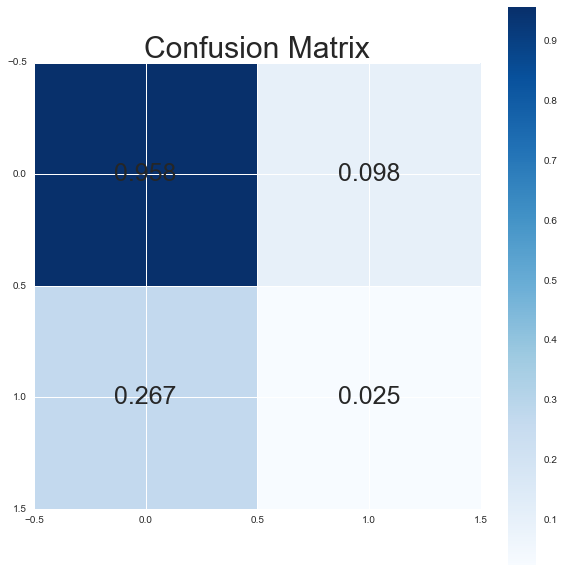

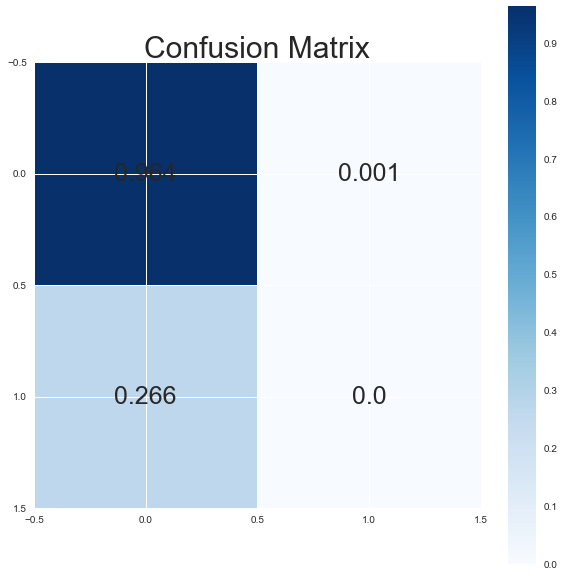

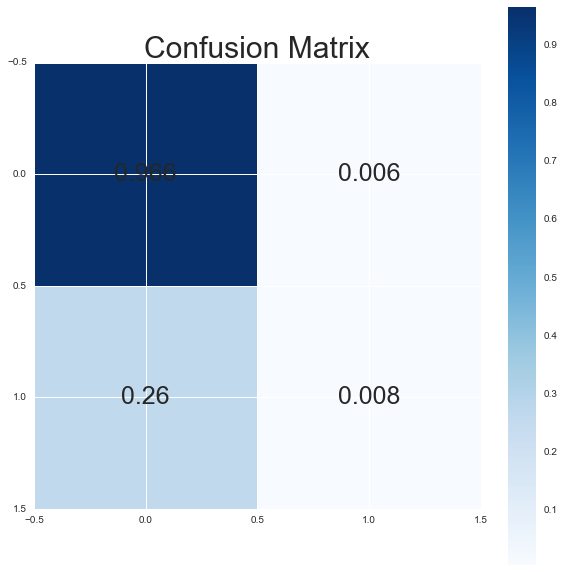

In [62]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from numpy.linalg import norm
%matplotlib inline

# copied and pasted then modded from stackoverflow question to obtain
def perf_measure(y_actual, y_hat):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    
    for i in range(len(y_hat)):
        if y_actual[i][0] == y_hat[i] == 1:
            tp += 1
        elif y_actual[i][0] == 1 and y_actual[i][0] != y_hat[i]:
            fp += 1
        elif y_actual[i][0] == 0 and y_actual[i][0] != y_hat[i]:
            fn += 1
        elif y_actual[i][0] == y_hat[i] == 0:
            tn += 1
            
    return (tp, fp, fn, tn)


def normalized_confusion_matrix(cm):
    total = norm(cm)
    result = cm.tolist()
    
    row = 0
    for row_elements in cm:
        col = 0
        for col_element in row_elements:
            result[row][col] = round(float(col_element) / float(total), 3)
            col += 1
        row += 1
        
    return np.array(result)


cm_rf = normalized_confusion_matrix(confusion_matrix(y_test, rfc_pred, labels=[1, 0]))
cm_rf_ht = normalized_confusion_matrix(confusion_matrix(y_test, hypertuned_rfc_pred, labels=[1, 0]))
cm_svm = normalized_confusion_matrix(confusion_matrix(y_test, pred, labels=[1, 0]))
# cm_nb = normalized_confusion_matrix(confusion_matrix(y_test, nb_pred, labels=[1, 0]))

print cm_rf
print norm(cm_rf)


def plot_confusion_matrix(cm, cmap=pl.cm.Blues):
    pl.figure(figsize=(10, 10))
    pl.imshow(cm, interpolation='nearest', cmap=cmap)
    pl.title("Confusion Matrix")
    pl.colorbar()
    pl.title("Confusion Matrix", size=30)
    for x in range(0,2):
        for y in range(0, 2):
            pl.annotate(str(cm[x][y]), xy = (y, x),
                        horizontalalignment='center', 
                        verticalalignment='center',
                        size=25)

print "Confusion Matrices for RF, hypertuned-RF, and SVM, respectively"
plot_confusion_matrix(cm_rf)
plot_confusion_matrix(cm_rf_ht)
plot_confusion_matrix(cm_svm)
# plot_confusion_matrix(cm_nb)

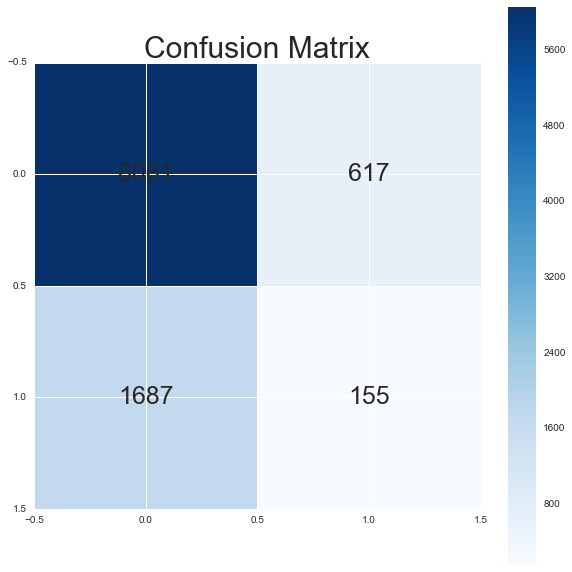

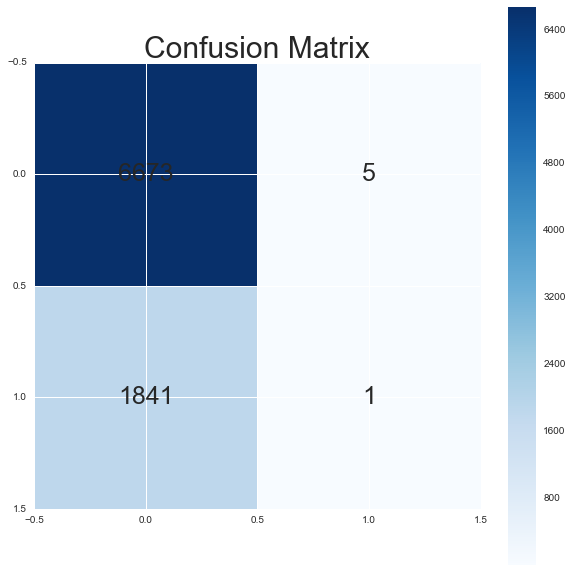

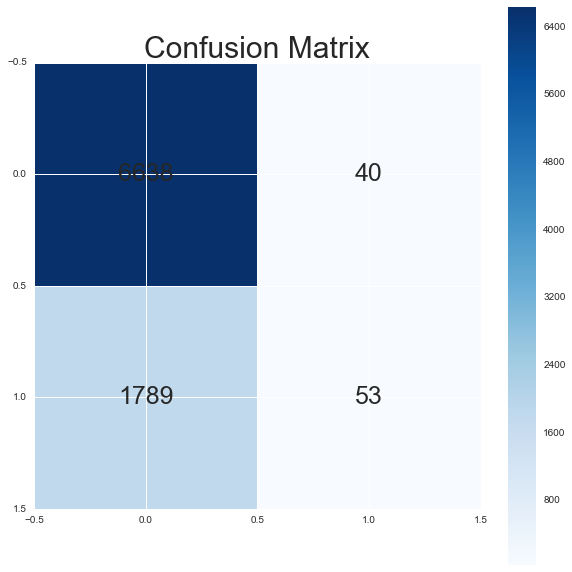

In [66]:
plot_confusion_matrix(confusion_matrix(y_test, rfc_pred, labels=[1, 0]))
plot_confusion_matrix(confusion_matrix(y_test, hypertuned_rfc_pred, labels=[1, 0]))
plot_confusion_matrix(confusion_matrix(y_test, pred, labels=[1, 0]))
# plot_confusion_matrix(confusion_matrix(y_test, nb_pred, labels=[1, 0]))

In [63]:
from sklearn.metrics import classification_report

print "Random Forest:"
print classification_report(y_test, rfc_pred, labels=[1, 0])
print cm_rf
print "\nRandom Forest Hypertuned:"
print classification_report(y_test, hypertuned_rfc_pred, labels=[1, 0])
print cm_rf_ht
print "\nSupport Vector Machine:"
print classification_report(y_test, pred, labels=[1, 0])
print cm_svm

Random Forest:
             precision    recall  f1-score   support

          1       0.78      0.91      0.84      6678
          0       0.20      0.08      0.12      1842

avg / total       0.66      0.73      0.68      8520

[[ 0.958  0.098]
 [ 0.267  0.025]]

Random Forest Hypertuned:
             precision    recall  f1-score   support

          1       0.78      1.00      0.88      6678
          0       0.17      0.00      0.00      1842

avg / total       0.65      0.78      0.69      8520

[[ 0.964  0.001]
 [ 0.266  0.   ]]

Support Vector Machine:
             precision    recall  f1-score   support

          1       0.79      0.99      0.88      6678
          0       0.57      0.03      0.05      1842

avg / total       0.74      0.79      0.70      8520

[[ 0.966  0.006]
 [ 0.26   0.008]]


## Feature Importances

Random forests has a very insightful method, called feature_importances_
Using this, we can see what feature columns make the largest impact on determining the prediction.

In [64]:
print "Feature importances:\n\n{}".format(rfc_fi_[:10])

Feature importances:

agree_loveboss                 0.147481
occupation                     0.048557
age_range                      0.044876
important_promotion            0.036772
programming_ability            0.036177
experience_range               0.035198
important_wfh                  0.030258
important_newtech              0.029917
Opportunity for advancement    0.026280
Salary                         0.025798
dtype: float64


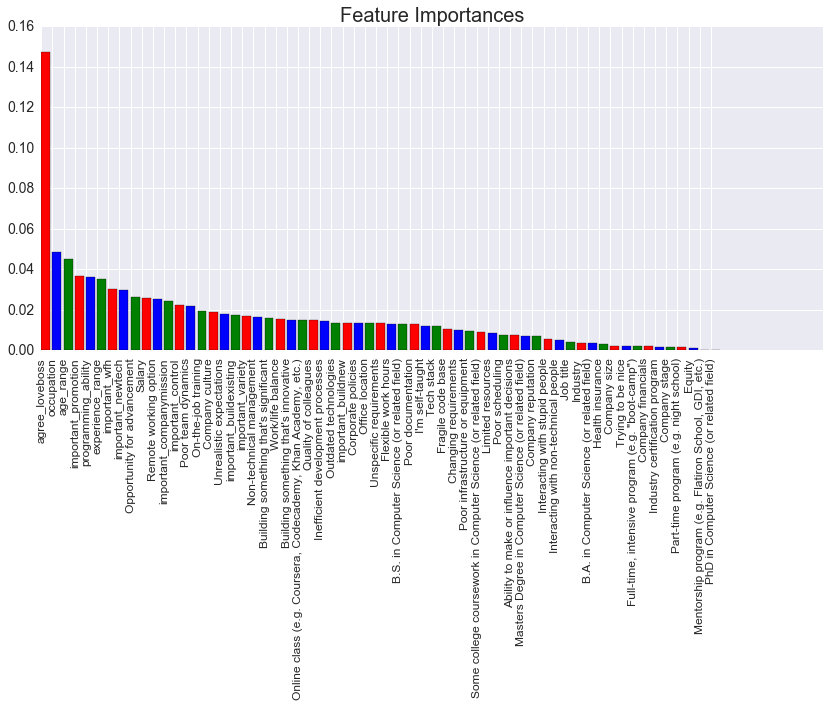

In [65]:
# plotting feature importances in descending order
pl.figure(figsize=(14, 6))
pl.title("Feature Importances", size=20)
pl.bar(np.arange(len(rfc_fi_.index)),
       rfc_fi_.values,
       color=('red', 'blue', 'green'),
       tick_label=list(rfc_fi_.index))
pl.xticks(np.arange(len(rfc_fi_.index)), list(rfc_fi_.index), rotation='vertical', fontsize=12)
pl.yticks(size=14)
pl.subplots_adjust(bottom=.15)

## Playing around with XGBoost (ongoing)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
params = {'booster': 'gbtree', 'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }

tree_booster_params = {'eta': 1, 'gamma': 1, 'min_child_weight': 1, 'max_depth': 3}
watchlist  = [(dtest,'eval'), (dtrain,'train')]

num_round = 3
bst = xgb.train(params, dtrain, num_boost_round=num_round)
preds = bst.predict(dtest)
labels = dtest.get_label()

print sorted(bst.get_fscore().items(), key=lambda t: -t[1])
print ('error=%f' % ( sum(1 for i in range(len(preds)) if int(preds[i]>0.5)!=labels[i]) /float(len(preds))))

# dtrain.feature_names

# help('xgboost.DMatrix')

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.mixture import GMM

pipe_lr = Pipeline([("scl", StandardScaler()),
                    ("pca", PCA()),
                    ("gmm", GMM())
                ])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=None, whiten=False)), ('gmm', GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=1, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0))])

In [190]:
# Reduce the data into the necessary amount of dimensions
# Scale the data to find a correlation among the variables
pipe_lr.score(X_test, y_test)

array([-80.89847253, -74.32967353, -71.61493557, ..., -76.54780089,
       -90.40464955, -70.81135511])